ADF Statistic: -2.256990350047235
p-value: 0.1862146911658712
Critical Values: {'1%': np.float64(-3.4476305904172904), '5%': np.float64(-2.869155980820355), '10%': np.float64(-2.570827146203181)}


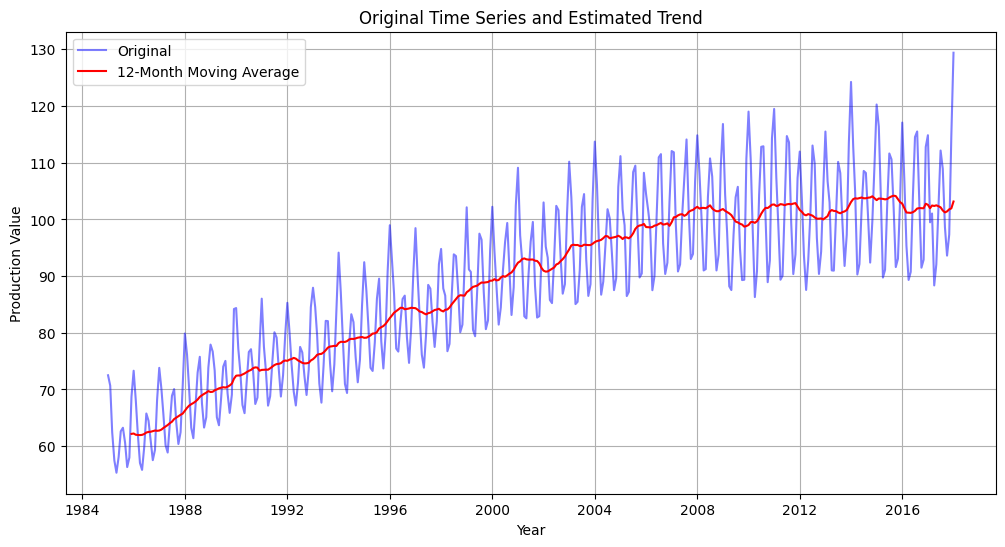

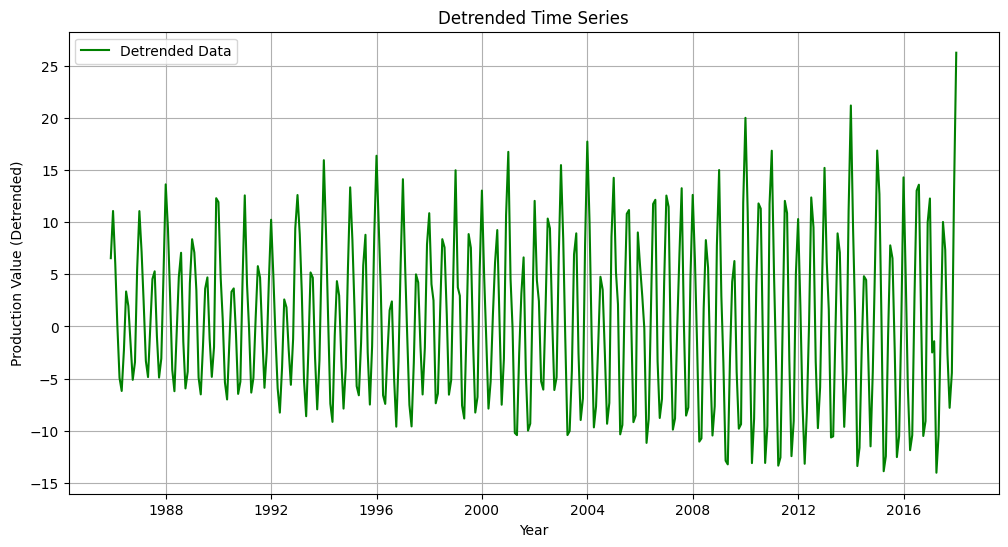

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller

file_path = "/content/Electric_Production.csv"
df = pd.read_csv(file_path)


df['DATE'] = pd.to_datetime(df['DATE'])
df.set_index('DATE', inplace=True)


result = adfuller(df['IPG2211A2N'])
print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values:", result[4])

window_size = 12
df['Moving_Avg'] = df['IPG2211A2N'].rolling(window=window_size).mean()


df['Detrended'] = df['IPG2211A2N'] - df['Moving_Avg']


plt.figure(figsize=(12, 6))
plt.plot(df.index, df['IPG2211A2N'], label='Original', color='blue', alpha=0.5)
plt.plot(df.index, df['Moving_Avg'], label=f'{window_size}-Month Moving Average', color='red')
plt.title('Original Time Series and Estimated Trend')
plt.xlabel('Year')
plt.ylabel('Production Value')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Detrended'], label='Detrended Data', color='green')
plt.title('Detrended Time Series')
plt.xlabel('Year')
plt.ylabel('Production Value (Detrended)')
plt.legend()
plt.grid(True)
plt.show()